In [1]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd 
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = 'C:/Windows/Fonts/malgun.ttf' # 폰트 파일 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [2]:
# Excel 데이터를 데이터프레임으로 변환
df = pd.read_excel('시도별 전출입 인구수.xlsx', header=0)

In [3]:
# 전출지별에서 누락값(NaN)을 앞 데이터로 채움(엑셀 양식 병합 부분)
df = df.fillna(method='ffill')

In [4]:
# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

In [5]:
# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

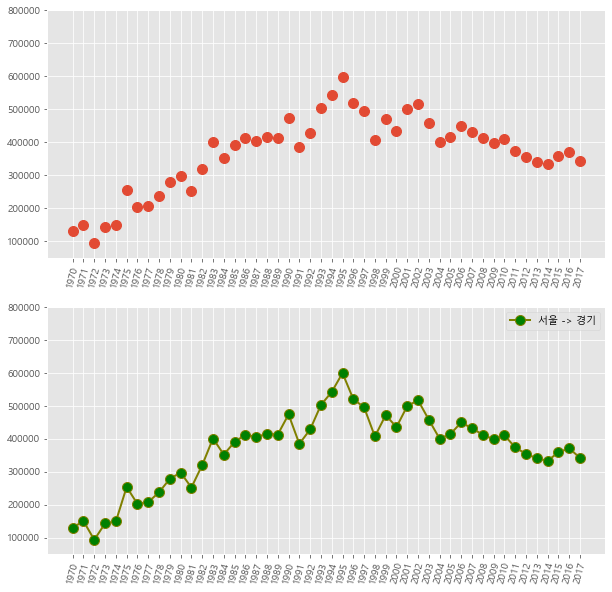

In [6]:
# 스타일 서식 지정
plt.style.use('ggplot')

# 그래프 객체 생성(figure에 2개의 서브 플롯 생성)
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

# axe 객체에 plot 함수로 그래프 출력
ax1.plot(sr_one, 'o', markersize=10)
ax2.plot(sr_one, marker='o', markerfacecolor='green', markersize=10,
        color='olive', linewidth=2, label= '서울 -> 경기')
ax2.legend(loc='best')

# y축 범위 지정(최소값, 최대값)
ax1.set_ylim(50000, 800000)
ax2.set_ylim(50000, 800000)

# 축 눈금 라벨 지정 및 75도 회전
ax1.set_xticklabels(sr_one.index, rotation=75)
ax2.set_xticklabels(sr_one.index, rotation=75)

plt.show()